In [1]:
import numpy as np 
import pandas as pd 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [ ]:
df.info()

# Exploaratory Data Analysis

## 1. Target Distribution

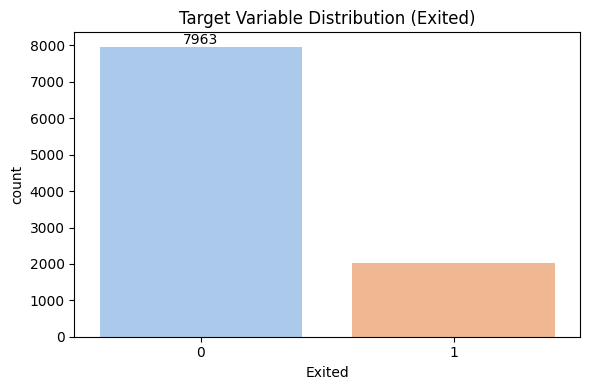

In [10]:
fig1, ax1 = plt.subplots(figsize=(6,4))
sns.countplot(x='Exited', data=df, ax=ax1, palette='pastel')
ax1.set_title('Target Variable Distribution (Exited)')
ax1.bar_label(ax1.containers[0])
plt.tight_layout()

## 2. Age Distribution by Target

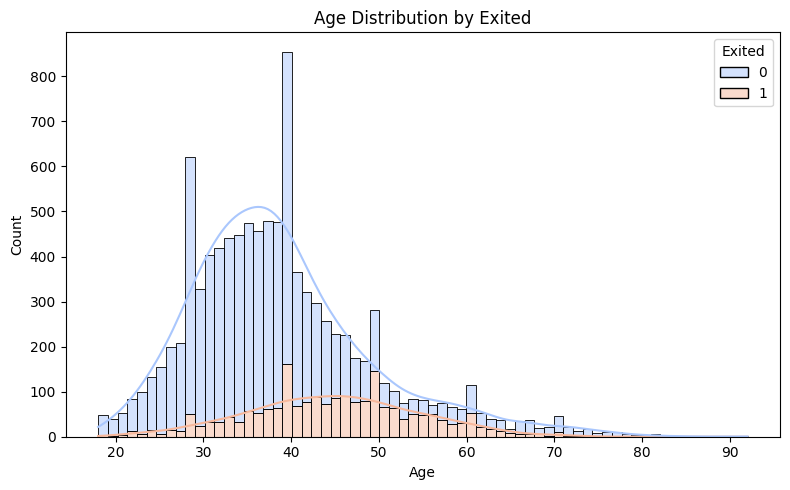

In [11]:
fig2, ax2 = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Exited', kde=True, ax=ax2, palette='coolwarm', multiple='stack')
ax2.set_title('Age Distribution by Exited')
plt.tight_layout()

## 3. Bar Plot: Geography vs Exited

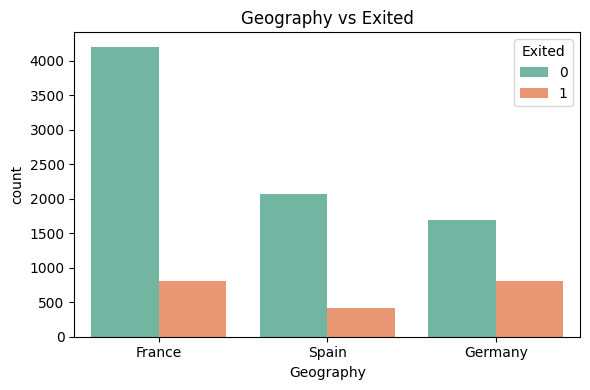

In [12]:
fig3, ax3 = plt.subplots(figsize=(6,4))
sns.countplot(x='Geography', hue='Exited', data=df, ax=ax3, palette='Set2')
ax3.set_title('Geography vs Exited')
ax3.legend(title='Exited')
plt.tight_layout()

## 4. Boxplot: Balance by Exited

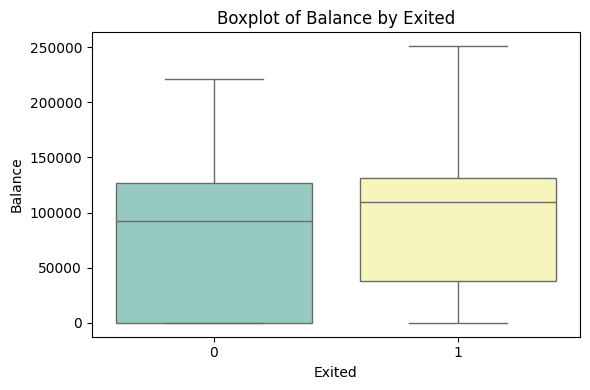

In [13]:
fig4, ax4 = plt.subplots(figsize=(6,4))
sns.boxplot(x='Exited', y='Balance', data=df, ax=ax4, palette='Set3')
ax4.set_title('Boxplot of Balance by Exited')
plt.tight_layout()

## 5. Violin Plot: Credit Score by Exited

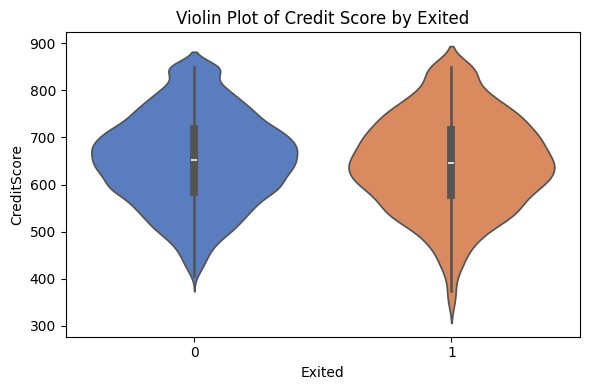

In [14]:
fig5, ax5 = plt.subplots(figsize=(6,4))
sns.violinplot(x='Exited', y='CreditScore', data=df, ax=ax5, palette='muted')
ax5.set_title('Violin Plot of Credit Score by Exited')
plt.tight_layout()


## 6. Correlation Heatmap

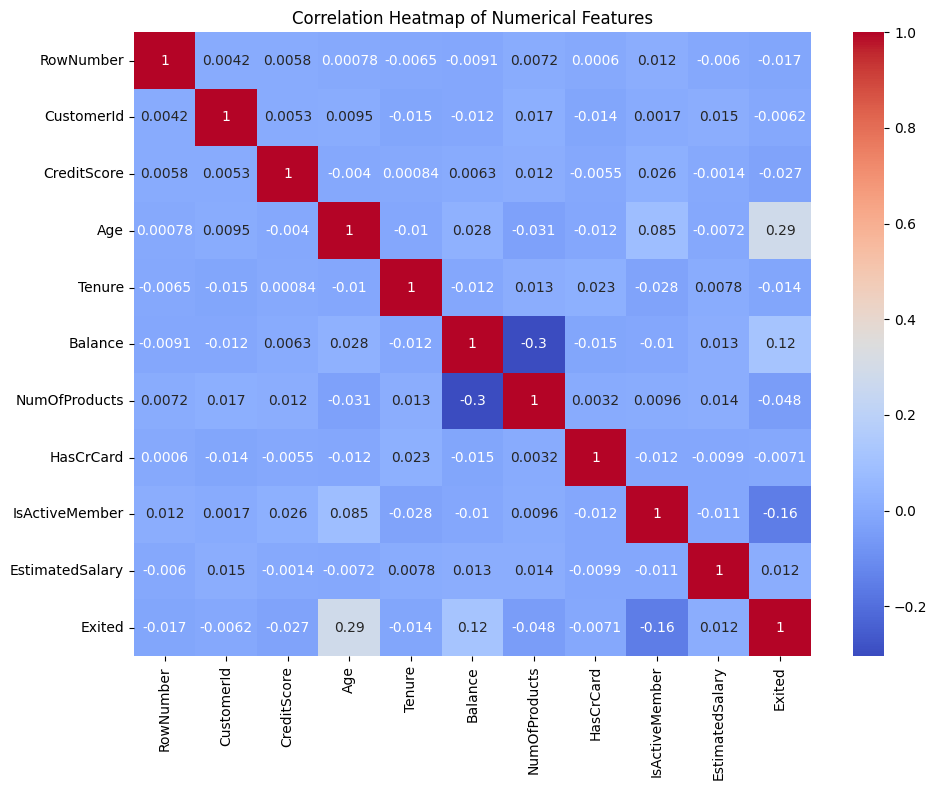

In [15]:
fig6, ax6 = plt.subplots(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax6)
ax6.set_title('Correlation Heatmap of Numerical Features')
plt.tight_layout()

## 7. Pairplot

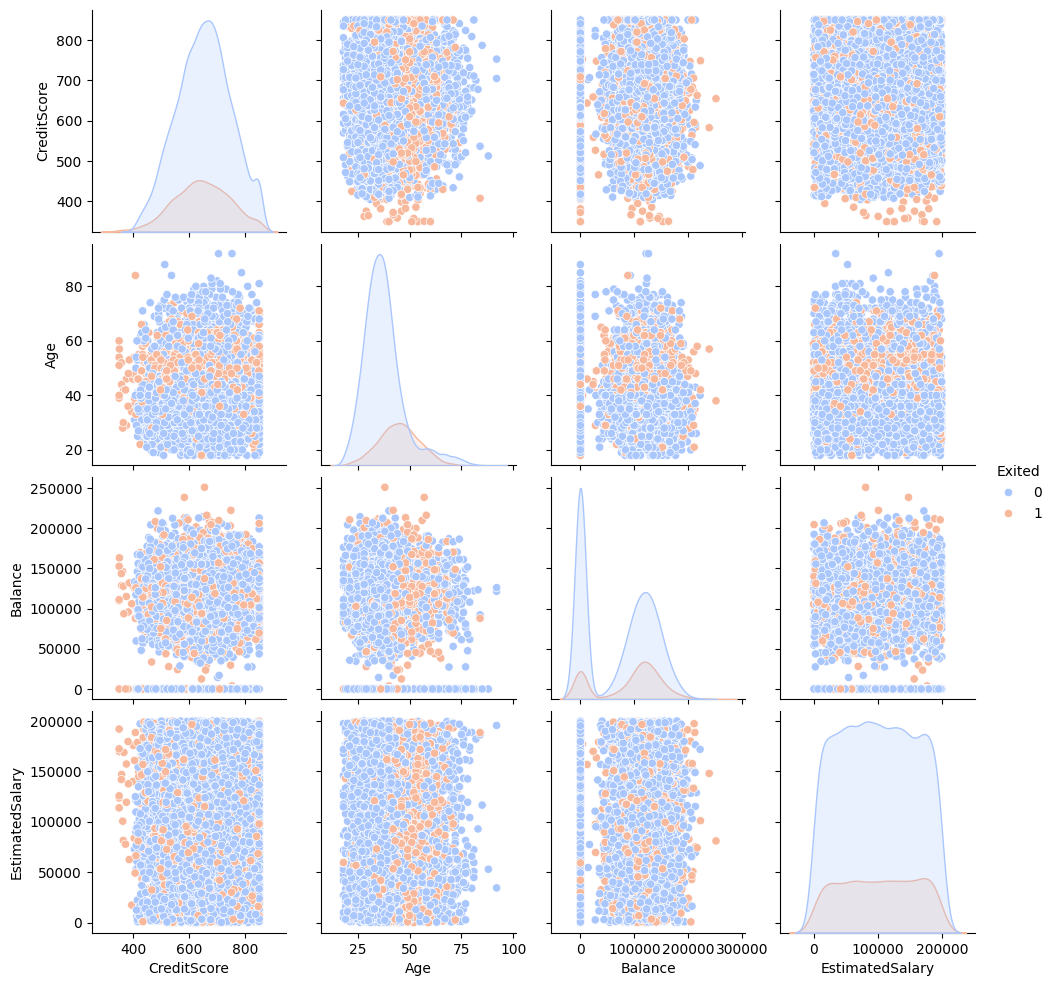

In [16]:
sns.pairplot(df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited', palette='coolwarm')
plt.show()

In [17]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [18]:
columns_to_encode = ['Geography','Gender']
df_dummies = pd.get_dummies(df[columns_to_encode],drop_first=True)
df=pd.concat([df,df_dummies],axis=1)
df  = df.drop(columns=['Geography','Gender'],axis=1)

In [19]:
X= df.drop(['Exited'],axis=1)
y=df['Exited']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Logistic Regression

In [21]:
lr = LogisticRegression(max_iter=1000)

param_grid = {
    "C": [0.1, 1.0, 10.0],
    "solver": ["liblinear", "lbfgs"]
}

lg = GridSearchCV(lr,
                  param_grid, 
                  cv=3, 
                  scoring='accuracy', 
                  n_jobs=-1)

lg.fit(X_train, y_train)

print("\nBest Params - LogisticRegression:", lg.best_params_)
logreg_preds = lg.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, logreg_preds))



Best Params - LogisticRegression: {'C': 10.0, 'solver': 'lbfgs'}

Accuracy: 0.8144


## Decision Tree

In [23]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # or 'log_loss' for newer versions
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

In [24]:
dt = DecisionTreeClassifier(random_state=42)

dt_grid = GridSearchCV(estimator=dt,
                       param_grid=param_grid,
                       cv=5,               
                       scoring='accuracy', 
                       n_jobs=-1)          
                       # ,verbose=0)      

dt_grid.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 3, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [26]:
print("\nBest Params - DecisionTree:", dt_grid.best_params_)
dt_preds = dt_grid.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, dt_preds))


Best Params - DecisionTree: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2}

Accuracy: 0.8596


## RandomForestClassifier + GridSearchCV

In [27]:
rf_param = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5]
}

In [28]:
rf  = RandomForestClassifier(random_state=42)

In [29]:
param_grid = GridSearchCV(rf, 
                       rf_param, 
                       cv=3, 
                       scoring='accuracy', 
                       n_jobs=-1)

In [30]:
param_grid.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [31]:
print("Best Params - RandomForest:", param_grid.best_params_)
rf_preds = param_grid.predict(X_test)
print("Accuracy:", accuracy_score(y_test, rf_preds))

Best Params - RandomForest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8684


## XGBClassifier + GridSearchCV

In [32]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2]
}

In [33]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_grid = GridSearchCV(xgb, 
                        param_grid, 
                        cv=3, 
                        scoring='accuracy', 
                        n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print("\n Best Params - XGBoost:", xgb_grid.best_params_)
xgb_preds = xgb_grid.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, xgb_preds))


 Best Params - XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Accuracy: 0.8664
